In [21]:
from numpy import load
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit



nu
[  0.47317561   0.47364167   0.47410864 ... 236.37079595 236.50620759
 236.64158153]
Tsig
[ 0.00000000e+00 -8.56770291e-09 -8.51986238e-09 ...  2.65184016e-03
  2.64729438e-03  2.64276187e-03]
[ 0.47317561  0.47364167  0.47410864 ... 49.79705315 49.85427452
 49.96878272]
[ 0.00000000e+00 -8.56770291e-09 -8.51986238e-09 ... -1.32996469e-02
 -1.34936707e-02 -1.38915877e-02]


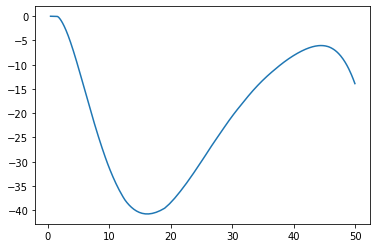

In [22]:
data = load("signal.npz")
lst = data.files
for item in lst:
    print(item)
    print(data[item])

nu = data['nu']
nu_50 = nu[nu<50]
nu6 = nu_50*1E6

Tsig = data['Tsig']
Tsig_50 = Tsig[nu<50]
Tsig3 = Tsig_50*1E3

plt.plot(nu_50,Tsig3)
length = len(nu_50)
print(nu_50)
print(Tsig_50)

In [23]:
nu0 = 20E6 #hz
def func(x,a,b):
    return (40000+a)*(x/nu0)**(-2.5+b)             #without pre weighting with nu^(-2.5)
def func2(x,a,b):
    return ((40000+a)*(x/nu0)**(-2.5+b))/((40000)*(x/nu0)**(-2.5))    #with pre weighting with nu^(-2.5)

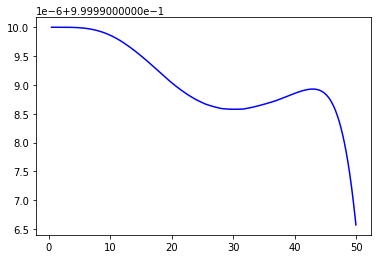

In [24]:
T2 = func(nu6,0,0)                                 #T2 is the foreground from trivial power law
Tdata = (T2 + Tsig_50)/((40000)*(nu6/nu0)**(-2.5))                   # Tdata is foreground + signal, and scaled by nu6^(-2.5)
#print(Tdata)
plt.plot(nu_50,Tdata,'b-',label = 'data')

In [25]:
popt,pcov = curve_fit(func2,nu6,Tdata)             #curve-fitting done with the scaling of nu6^(-2.5)
popt

array([-4.18640223e-02, -3.44479204e-07])

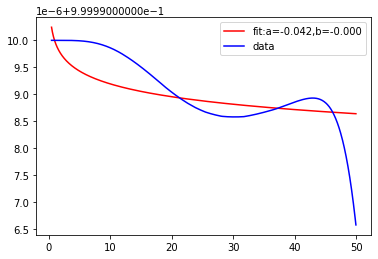

In [26]:
plt.plot(nu_50,func2(nu6,*popt),'r-',label = 'fit:a=%5.3f,b=%5.3f' %tuple(popt))
plt.plot(nu_50,Tdata,'b-',label = 'data')
plt.legend() #with weighting (foreground+signal)

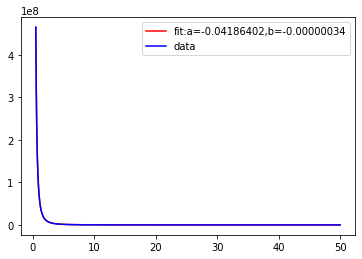

In [27]:
plt.plot(nu_50,func2(nu6,*popt)*((40000)*(nu6/nu0)**(-2.5)),'r-',label = 'fit:a=%10.8f,b=%10.8f' %tuple(popt))
plt.plot(nu_50,Tdata*((40000)*(nu6/nu0)**(-2.5)),'b-',label = 'data')
plt.legend()  #without weighting (foreground + signal)

(-100.0, 50.0)

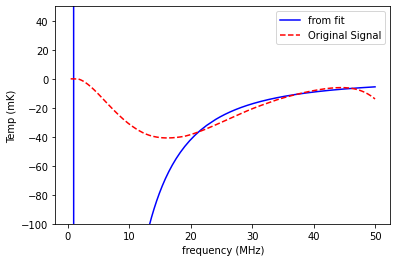

In [28]:
fit = func2(nu6,*popt)*((40000)*(nu6/nu0)**(-2.5))
Tsig_fit = (fit - T2)*1e3
plt.plot(nu_50,Tsig_fit,'b-',label='from fit')
plt.plot(nu_50,Tsig3,'r--',label = 'Original Signal')
plt.xlabel("frequency (MHz)")
plt.ylabel("Temp (mK)")
plt.legend()
plt.ylim(-100,50)  #original signal vs signal from fitting

In [29]:
a = popt[0]
print(a)

-0.04186402229245016


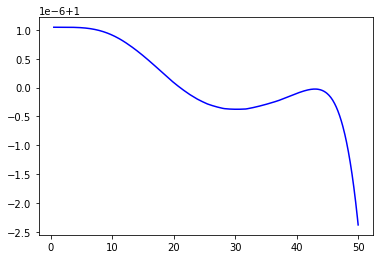

In [30]:
Tdata2 = (T2 + Tsig_50)/((40000+a)*(nu6/nu0)**(-2.5))
plt.plot(nu_50,Tdata2,'b-',label = 'data')   

In [31]:
def func3(x,b):
    return ((40000+a)*(x/nu0)**(-2.5+b))/((40000+a)*(x/nu0)**(-2.5))
    

In [32]:
popt,pcov = curve_fit(func3,nu6,Tdata2)             #curve-fitting done with the scaling of nu6^(-2.5)
popt

array([-3.4447726e-07])

b still has the same value. i.e of the order of -7.